In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [21]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [22]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [23]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [24]:
X.shape

(6, 3)

In [25]:
# reshape from [samples, timesteps] into [samples, timesteps, features] , as a #D
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [26]:
#LSTM model

In [27]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)

In [30]:
#prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[223.78072]
1 day input [196.         210.         223.78071594]
1 day output [[234.45865]]
2 day input [210.         223.78071594 234.45864868]
2 day output [[248.30074]]
3 day input [223.78072 234.45865 248.30074]
3 day output [[261.7457]]
4 day input [234.45865 248.30074 261.7457 ]
4 day output [[274.57858]]
5 day input [248.30074 261.7457  274.57858]
5 day output [[289.149]]
6 day input [261.7457  274.57858 289.149  ]
6 day output [[303.64734]]
7 day input [274.57858 289.149   303.64734]
7 day output [[318.84116]]
8 day input [289.149   303.64734 318.84116]
8 day output [[334.96738]]
9 day input [303.64734 318.84116 334.96738]
9 day output [[351.65756]]
[223.78072, 234.45865, 248.30074, 261.7457, 274.57858, 289.149, 303.64734, 318.84116, 334.96738, 351.65756]


In [31]:
#visualization

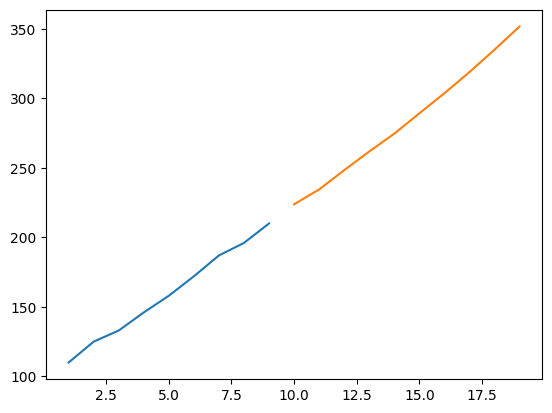

In [32]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)